In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tqdm import tqdm

import os
# Iterate through the directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))  # This will print the full path of each file

# Loading Data

In [13]:
df = pd.read_csv("TCS_stock_history.csv")

In [14]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


In [15]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4463 non-null   object 
 1   Open          4463 non-null   float64
 2   High          4463 non-null   float64
 3   Low           4463 non-null   float64
 4   Close         4463 non-null   float64
 5   Volume        4463 non-null   int64  
 6   Dividends     4463 non-null   float64
 7   Stock Splits  4463 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 279.1+ KB


In [17]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')

In [18]:
df.describe()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4463,4463.000000,4463.000000,4463.000000,4463.000000,4.463000e+03,4463.000000,4463.000000
mean,2012-08-23 19:22:31.109119488,866.936239,876.675013,856.653850,866.537398,3.537876e+06,0.071533,0.001344
min,2002-08-12 00:00:00,24.146938,27.102587,24.146938,26.377609,0.000000e+00,0.000000,0.000000
25%,2008-02-14 12:00:00,188.951782,191.571816,185.979417,188.594620,1.860959e+06,0.000000,0.000000
50%,2012-09-04 00:00:00,530.907530,534.751639,525.616849,529.713257,2.757742e+06,0.000000,0.000000
75%,2017-03-22 12:00:00,1156.462421,1165.815854,1143.622800,1154.784851,4.278625e+06,0.000000,0.000000
max,2021-09-30 00:00:00,3930.000000,3981.750000,3892.100098,3954.550049,8.806715e+07,40.000000,2.000000
std,NaN,829.905368,838.267104,821.233477,829.611313,3.273531e+06,0.965401,0.051842


# Correlation Of Features

In [19]:
corel=df.corr()
corel

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,1.000000,0.899114,0.899354,0.898962,0.899214,-0.177351,0.062321,-0.005701
Open,0.899114,1.000000,0.999888,0.999892,0.999787,-0.153362,0.059743,-0.006715
High,0.899354,0.999888,1.000000,0.999867,0.999914,-0.150918,0.060044,-0.006597
Low,0.898962,0.999892,0.999867,1.000000,0.999901,-0.154962,0.059916,-0.006622
Close,0.899214,0.999787,0.999914,0.999901,1.000000,-0.152844,0.060179,-0.006635
Volume,-0.177351,-0.153362,-0.150918,-0.154962,-0.152844,1.000000,-0.010332,0.004752
Dividends,0.062321,0.059743,0.060044,0.059916,0.060179,-0.010332,1.000000,0.142493
Stock Splits,-0.005701,-0.006715,-0.006597,-0.006622,-0.006635,0.004752,0.142493,1.000000


In [20]:
# Correlation of features with the target variable (Close Price)
correlation_with_close= df.corr()['Close'].sort_values(ascending=False)
print(correlation_with_close)

Close           1.000000
High            0.999914
Low             0.999901
Open            0.999787
Date            0.899214
Dividends       0.060179
Stock Splits   -0.006635
Volume         -0.152844
Name: Close, dtype: float64


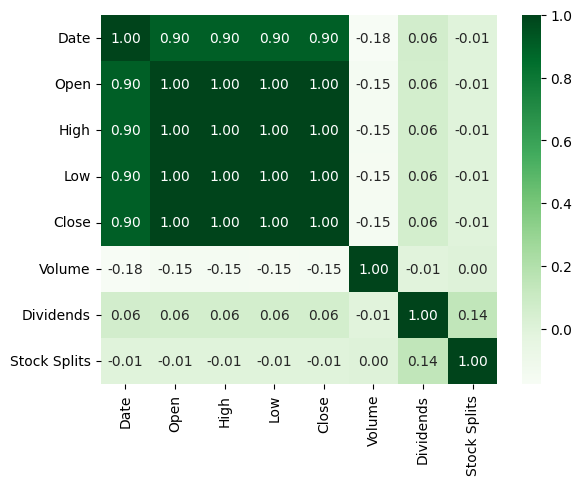

In [21]:
sns.heatmap(corel,annot= True,cmap= "Greens",fmt=".2f")
plt.show()

# Exploratory Data Analysis

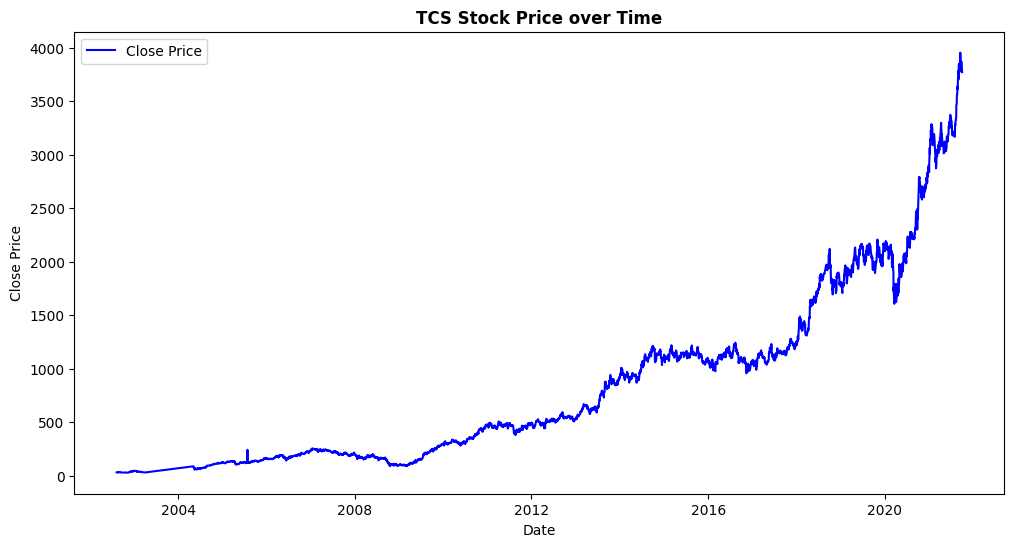

In [23]:
#Time series of stock prices

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price',color='b')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('TCS Stock Price over Time',weight = "bold")
plt.legend()
plt.show()

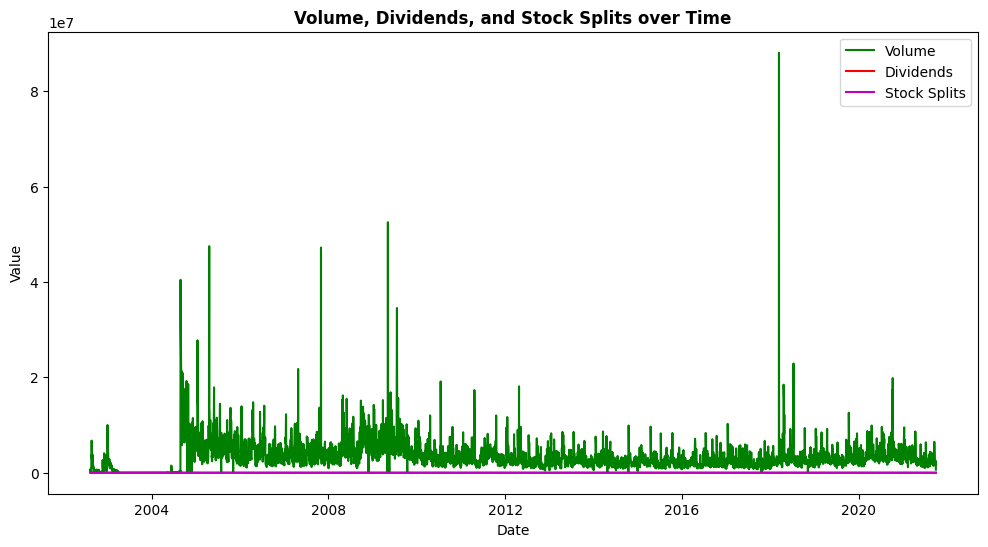

In [24]:
# Volume, Dividends, Stock Splits

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'], label='Volume', color='g')
plt.plot(df['Date'], df['Dividends'], label='Dividends', color='r')
plt.plot(df['Date'], df['Stock Splits'], label='Stock Splits', color='m')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Volume, Dividends, and Stock Splits over Time',weight = "bold")
plt.legend()
plt.show()

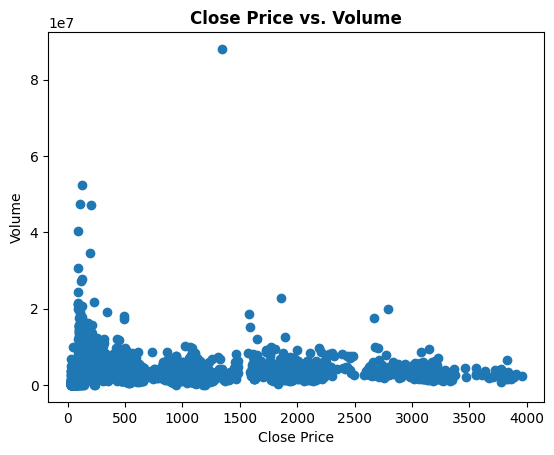

In [25]:
# Close vs Volume

plt.scatter(df['Close'], df['Volume'])
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.title('Close Price vs. Volume',weight= "bold")
plt.show()

# Dividends and Stock Splits

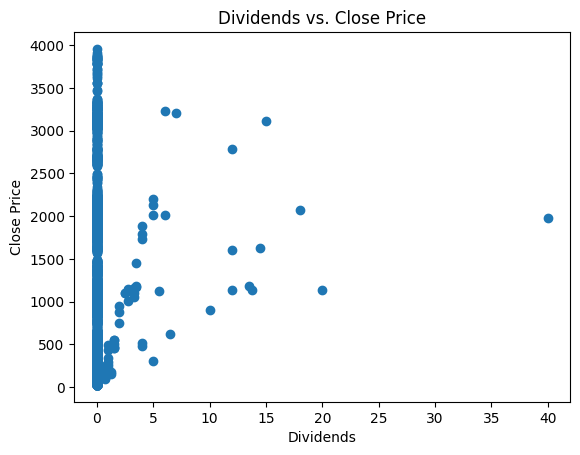

In [26]:
# Dividends vs. Close Price

plt.scatter(df['Dividends'], df['Close'])
plt.xlabel('Dividends')
plt.ylabel('Close Price')
plt.title('Dividends vs. Close Price')
plt.show()

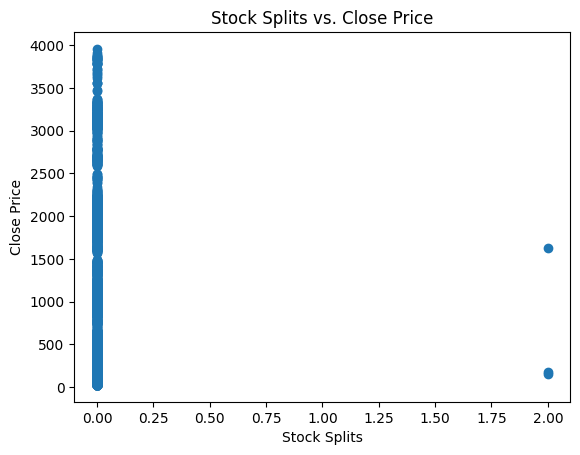

In [28]:
# Stock Splits vs. Close Price

plt.scatter(df['Stock Splits'], df['Close'])
plt.xlabel('Stock Splits')
plt.ylabel('Close Price')
plt.title('Stock Splits vs. Close Price')
plt.show()

# Moving Averages

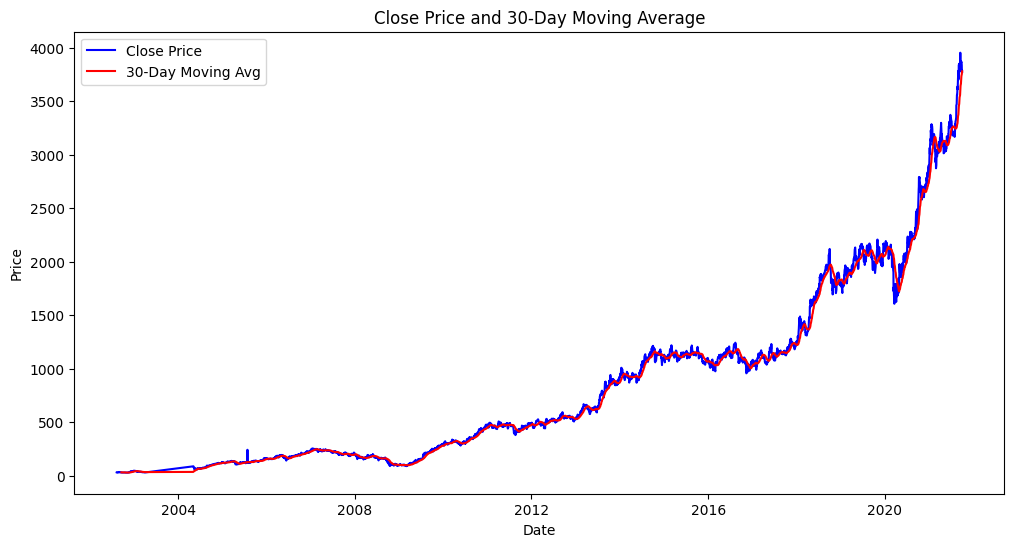

In [29]:

df['30-Day Moving Avg'] = df['Close'].rolling(window=30).mean()

# Plot Close price and moving average

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='b')
plt.plot(df['Date'], df['30-Day Moving Avg'], label='30-Day Moving Avg', color='r')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price and 30-Day Moving Average')
plt.legend()
plt.show()

# Moving Average Crossover Strategy

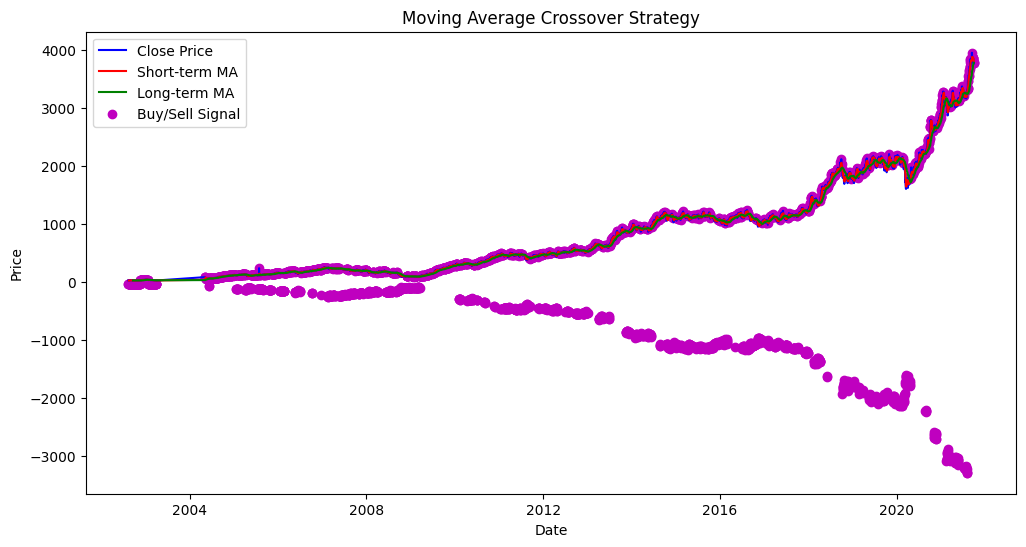

In [37]:

df['Short_MA'] = df['Close'].rolling(window=5).mean()
df['Long_MA'] = df['Close'].rolling(window=30).mean()

# Creating a trading signals based on moving average crossovers

df['Signal'] = np.where(df['Short_MA'] > df['Long_MA'], 1,-1)
                       
# Plot the strategy signals
                        
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='b')
plt.plot(df['Date'], df['Short_MA'], label='Short-term MA', color='r')
plt.plot(df['Date'], df['Long_MA'], label='Long-term MA', color='g')
plt.scatter(df['Date'], df['Close'] * df['Signal'],label='Buy/Sell Signal', marker='o', color='m')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Average Crossover Strategy')
plt.legend()
plt.show()

# Daily Price Change

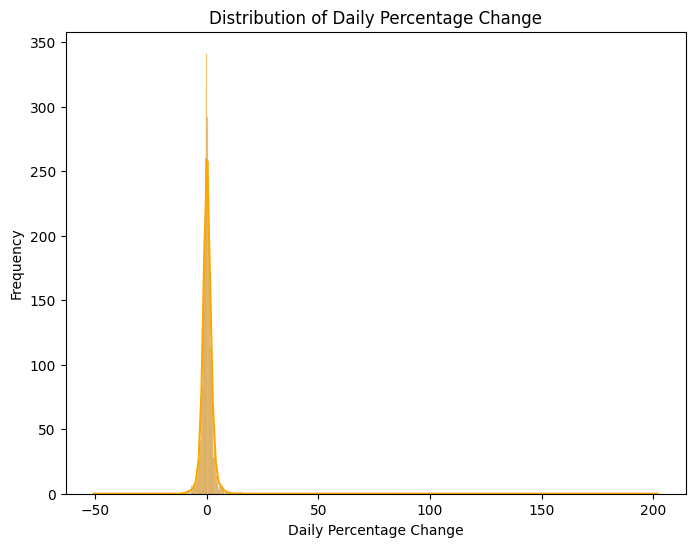

In [38]:

df['Daily_Price_Change'] = df['Close'].pct_change() * 100

# Distribution of daily percentage change

plt.figure(figsize=(8, 6))
sns.histplot(df['Daily_Price_Change'].dropna(), kde=True, color='orange')
plt.xlabel('Daily Percentage Change')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Percentage Change')
plt.show()

# Feature Engineering

In [39]:
df['Moving_Avg_Close'] = df['Close'].rolling(window=7).mean()

# Modelling

In [49]:
df.shape


(4463, 14)

#  Data Preparation & Normalization

In [40]:
# Prepare the data for LSTM

X_train = df["Close"].values.reshape(-1, 1)
y_train = df["Close"].shift(-1).dropna().values 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Define the test data

test_ratio = 0.2
test_size = int(len(df) * test_ratio)
test_data = df[-test_size:]

# Prepare the data for prediction

X_test = test_data["Close"].values.reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
X_test_lstm = X_test_scaled.reshape(-1, 1, 1)

# Reshaping Data

In [41]:
# Reshape the data for LSTM

X_train_lstm = X_train_scaled[:-1].reshape(-1, 1, 1)
y_train_lstm = X_train_scaled[1:]

# Building a LSTM Model

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:31<00:00,  1.06s/it]


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 377ms/step


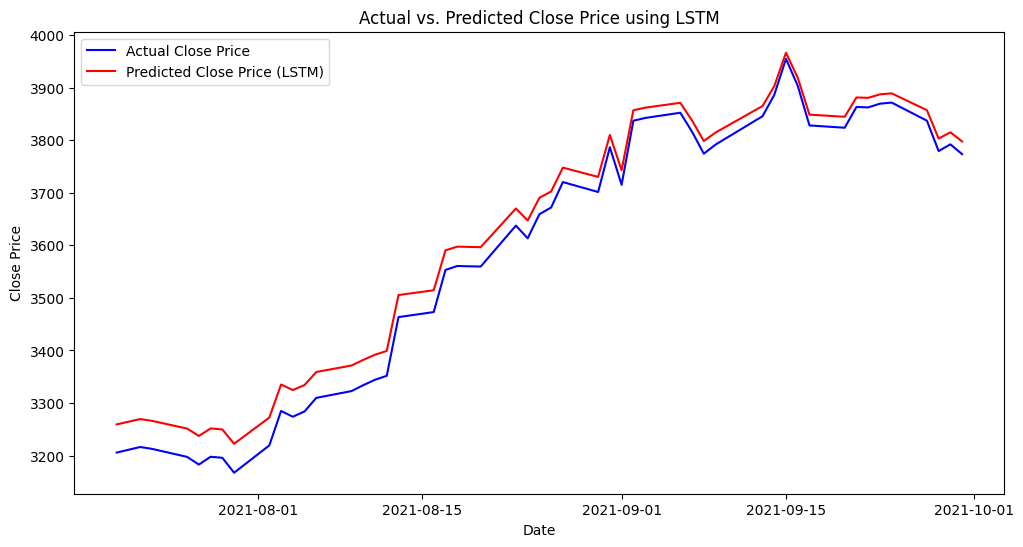

In [45]:
# Load and preprocess data (assuming df is defined)
scaler = MinMaxScaler(feature_range=(0,1))

# Prepare training data# 
df['Close'] = df['Close'].astype(float)  # it's float Ensure
train_data = df[['Close']].values  # Selecting the Close price
train_scaled = scaler.fit_transform(train_data)
X_train_lstm = train_scaled[:-1].reshape(-1, 1, 1)  # Features
y_train_lstm = train_scaled[1:].reshape(-1, 1)  # Labels

# Define LSTM Model
model = Sequential()
model.add(LSTM(50, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Training Parameters
epochs = 30
batch_size = 15

# Train the model with tqdm progress bar
for epoch in tqdm(range(epochs)):
    for i in range(0, len(X_train_lstm), batch_size):
        X_batch = X_train_lstm[i:i+batch_size]
        y_batch = y_train_lstm[i:i+batch_size]
        model.train_on_batch(X_batch, y_batch)

# Prepare the test data
test_data = df[['Close']].iloc[-50:]  # Last 50 data points for testing
X_test = test_data['Close'].values.reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
X_test_lstm = X_test_scaled.reshape(-1, 1, 1)

# Predictions using LSTM
lstm_predictions = model.predict(X_test_lstm).flatten()

# Inverse transform to get real values
lstm_predictions = lstm_predictions.reshape(-1, 1)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Visualization of LSTM predictions
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Close'], label='Actual Close Price', color='b')
plt.plot(test_data.index, lstm_predictions, label='Predicted Close Price (LSTM)', color='r')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Price using LSTM')
plt.legend()
plt.show()

# Mean Absolute Error

In [47]:
# Mean Absolute Error
lstm_mae = mean_absolute_error(test_data['Close'], lstm_predictions)
print("LSTM Mean Absolute Error:", lstm_mae)

LSTM Mean Absolute Error: 14209612.872016601


In [48]:
lstm_predictions = lstm_predictions.reshape(-1, 1)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
date_index=test_data.index[-len(lstm_predictions):]
predictions_df=pd.DataFrame({'Date':date_index,'Predicted_Close':lstm_predictions.flatten()}) 
predictions_df.to_csv('predictions.csv',index=False)

Processing Year: 2002


Training for Year 2002: 100%|██████████████████████████████████████████████████████████| 30/30 [00:05<00:00,  5.69it/s]


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step
Processing Year: 2003


Training for Year 2003: 100%|██████████████████████████████████████████████████████████| 30/30 [00:05<00:00,  5.44it/s]


1/6 ━━━━━━━━━━━━━━━━━━━━ 1s 369ms/stepWARNING:tensorflow:6 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002935970CB80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
Processing Year: 2004


Training for Year 2004: 100%|██████████████████████████████████████████████████████████| 30/30 [00:06<00:00,  4.84it/s]


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
Processing Year: 2005


Training for Year 2005: 100%|██████████████████████████████████████████████████████████| 30/30 [00:07<00:00,  3.79it/s]


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
Processing Year: 2006


Training for Year 2006: 100%|██████████████████████████████████████████████████████████| 30/30 [00:09<00:00,  3.26it/s]


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
Processing Year: 2007


Training for Year 2007: 100%|██████████████████████████████████████████████████████████| 30/30 [00:11<00:00,  2.70it/s]


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step
Processing Year: 2008


Training for Year 2008: 100%|██████████████████████████████████████████████████████████| 30/30 [00:12<00:00,  2.45it/s]


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step
Processing Year: 2009


Training for Year 2009: 100%|██████████████████████████████████████████████████████████| 30/30 [00:13<00:00,  2.17it/s]


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step
Processing Year: 2010


Training for Year 2010: 100%|██████████████████████████████████████████████████████████| 30/30 [00:15<00:00,  1.88it/s]


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
Processing Year: 2011


Training for Year 2011: 100%|██████████████████████████████████████████████████████████| 30/30 [00:16<00:00,  1.77it/s]


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step
Processing Year: 2012


Training for Year 2012: 100%|██████████████████████████████████████████████████████████| 30/30 [00:18<00:00,  1.65it/s]


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
Processing Year: 2013


Training for Year 2013: 100%|██████████████████████████████████████████████████████████| 30/30 [00:20<00:00,  1.49it/s]


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step
Processing Year: 2014


Training for Year 2014: 100%|██████████████████████████████████████████████████████████| 30/30 [00:21<00:00,  1.38it/s]


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
Processing Year: 2015


Training for Year 2015: 100%|██████████████████████████████████████████████████████████| 30/30 [00:20<00:00,  1.44it/s]


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step
Processing Year: 2016


Training for Year 2016: 100%|██████████████████████████████████████████████████████████| 30/30 [00:24<00:00,  1.24it/s]


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step
Processing Year: 2017


Training for Year 2017: 100%|██████████████████████████████████████████████████████████| 30/30 [00:25<00:00,  1.16it/s]


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
Processing Year: 2018


Training for Year 2018: 100%|██████████████████████████████████████████████████████████| 30/30 [00:27<00:00,  1.09it/s]


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step
Processing Year: 2019


Training for Year 2019: 100%|██████████████████████████████████████████████████████████| 30/30 [00:28<00:00,  1.06it/s]


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
Processing Year: 2020


Training for Year 2020: 100%|██████████████████████████████████████████████████████████| 30/30 [00:29<00:00,  1.01it/s]


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step


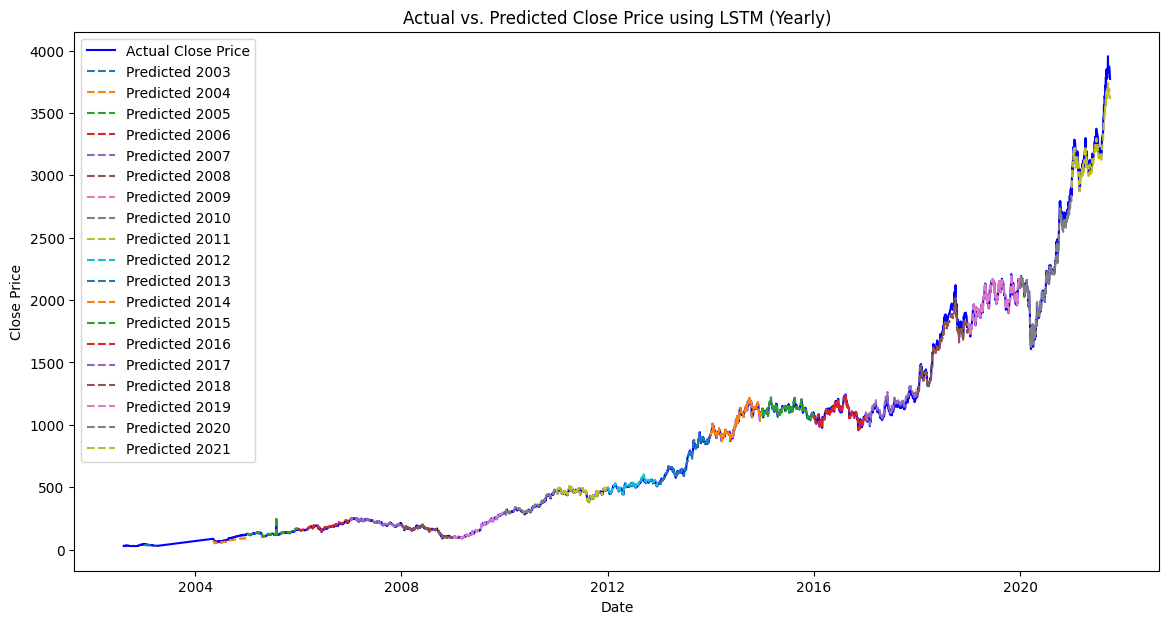

In [43]:
# Load data (Ensure df has 'Date' column)
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime format
df.set_index('Date', inplace=True)  # Set date as index
df['Year'] = df.index.year  # Extract year

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

# Dictionary to store results
yearly_predictions = {}

# Iterate over each year
for year in sorted(df['Year'].unique()[:-1]):  # Exclude last year for training
    print(f"Processing Year: {year}")
    
    # Train on data up to the current year
    train_data = df[df['Year'] <= year]['Close'].values.reshape(-1, 1)
    train_scaled = scaler.fit_transform(train_data)

    X_train_lstm = train_scaled[:-1].reshape(-1, 1, 1)  # Features
    y_train_lstm = train_scaled[1:].reshape(-1, 1)  # Labels

    # Define LSTM Model
    model = Sequential()
    model.add(LSTM(50, input_shape=(1, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model with tqdm progress bar
    epochs = 30
    batch_size = 15
    for epoch in tqdm(range(epochs), desc=f"Training for Year {year}"):
        for i in range(0, len(X_train_lstm), batch_size):
            X_batch = X_train_lstm[i:i+batch_size]
            y_batch = y_train_lstm[i:i+batch_size]
            model.train_on_batch(X_batch, y_batch)

    # Prepare test data (next year's data)
    next_year = year + 1
    if next_year in df['Year'].values:
        test_data = df[df['Year'] == next_year]['Close'].values.reshape(-1, 1)
        X_test_scaled = scaler.transform(test_data)
        X_test_lstm = X_test_scaled.reshape(-1, 1, 1)

        # Make predictions
        lstm_predictions = model.predict(X_test_lstm).flatten()
        lstm_predictions = lstm_predictions.reshape(-1, 1)
        lstm_predictions = scaler.inverse_transform(lstm_predictions)

        # Store results
        yearly_predictions[next_year] = lstm_predictions

# Visualization of LSTM Yearly Predictions
plt.figure(figsize=(14, 7))

# Plot actual prices
plt.plot(df.index, df['Close'], label='Actual Close Price', color='blue')

# Plot yearly predictions
for year, preds in yearly_predictions.items():
    pred_dates = df[df['Year'] == year].index
    plt.plot(pred_dates, preds, label=f'Predicted {year}', linestyle='dashed')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Price using LSTM (Yearly)')
plt.legend()
plt.show()